In [1]:
import pandas as pd
import os 

# Extracting Edge Features

## Import Libraries for the task

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.filters import prewitt_h, prewitt_v

We want to see if we can have access to the images by showing one

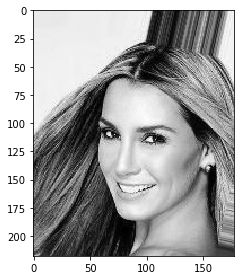

In [3]:
image_test = imread('./datasets/celeba/img/0.jpg', as_gray = True)
imshow(image_test);

Now let's see the dimensions of the image

In [4]:
image_test.shape,image_test

((218, 178),
 array([[0.91375412, 0.91375412, 0.91375412, ..., 0.90349176, 0.94214275,
         0.94214275],
        [0.91375412, 0.91375412, 0.91375412, ..., 0.91076941, 0.94214275,
         0.94214275],
        [0.91375412, 0.91375412, 0.91375412, ..., 0.92058471, 0.94606431,
         0.94606431],
        ...,
        [0.33162431, 0.23161294, 0.34982549, ..., 0.26388549, 0.26725647,
         0.26725647],
        [0.2865149 , 0.31788745, 0.42825686, ..., 0.24145725, 0.24819922,
         0.24819922],
        [0.43553451, 0.57671098, 0.73806078, ..., 0.24145725, 0.24706039,
         0.24706039]]))

Then we use the prewitt_h and prewitt_v to extrach respectively horizontal and vertical edges

In [5]:
edges_prewitt_horizontal = prewitt_h(image_test)
edges_prewitt_vertical = prewitt_v(image_test)

We look at the dimensions of the edges matrix

In [6]:
edges_prewitt_vertical.shape

(218, 178)

And we show the result

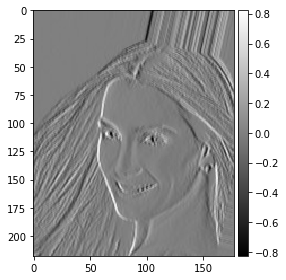

In [7]:
imshow(edges_prewitt_vertical,cmap = 'gray');

Then we reshape our matrix to obtain a 1D array of equivalent dimensions

In [8]:
features = np.reshape(edges_prewitt_vertical, (218*178))
features

array([0.        , 0.        , 0.        , ..., 0.00598275, 0.00598275,
       0.        ])

## Data separation

We define directions to acces the images

In [9]:
global basedir, image_paths, target_size
basedir = './datasets/celeba'
images_dir = os.path.join(basedir,'img')
labels_filename = 'labels2.csv'

The extract_feature_label() is a function used to extract images features and store them in an array. And also store the labels in another array.

In [10]:
def extract_features_labels():
  
    image_paths = [os.path.join(images_dir, l) for l in os.listdir(images_dir)] # Créer un path en incluant le nom de chaque mage ?
    target_size = None
    labels_file = open(os.path.join(basedir, labels_filename), 'r')
    lines = labels_file.readlines()
    gender_labels = {line.split(',')[0] : int(line.split(',')[2]) for line in lines[1:]}
    if os.path.isdir(images_dir): # SI le Path existe 
        all_features = []
        all_labels = []
        for img_path in image_paths: # Pour chaque image 
            file_name= img_path.split('.')[1].split('/')[-1]

            # load image
            img = imread(img_path, as_gray = True)
            edges = prewitt_v(img)
            #img = = prewitt_v(img_path)
            features = np.reshape(edges, (218*178))
            if features is not None:
                all_features.append(features)
                all_labels.append(gender_labels[file_name])

    landmark_features = np.array(all_features)
    gender_labels = (np.array(all_labels) + 1)/2 # simply converts the -1 into 0, so male=0 and female=1
    return landmark_features, gender_labels

The following get_data() function splits the data in training and test sets

In [11]:
def get_data():

    X, y = extract_features_labels()
    Y = np.array([y, -(y - 1)]).T
    tr_X = X[:3500]
    tr_Y = Y[:3500]
    te_X = X[3500:]
    te_Y = Y[3500:]

    return tr_X, tr_Y, te_X, te_Y

We run the get_data() function

In [12]:
tr_X, tr_Y, te_X, te_Y= get_data()

In [13]:
tr_X.shape, te_X.shape

((3500, 38804), (1500, 38804))

# Linear SVC (Support Vector Classifier)

Import Corresponding Libraries

In [14]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm

We then use the following function to classify the data and to print the accuracy

In [15]:
def img_SVM(training_images, training_labels, test_images, test_labels):
    classifier = svm.SVC(kernel = 'linear')
    classifier.fit(training_images, training_labels)
    pred = classifier.predict(test_images)
    print("Accuracy:", accuracy_score(test_labels, pred))

    print(pred)
    return pred

#pred=img_SVM(tr_X.reshape((100, 218*178)), list(zip(*tr_Y))[0], te_X.reshape((4900, 218*178)), list(zip(*te_Y))[0])
pred=img_SVM(tr_X, list(zip(*tr_Y))[0], te_X, list(zip(*te_Y))[0])

Accuracy: 0.8066666666666666
[1. 1. 1. ... 0. 1. 0.]


# K-Nearest Neighbours

We import corresponding Libraries

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

Extract again features

In [17]:
X, y = extract_features_labels()

Split the data in two sets

In [18]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=3)

In [19]:
print('train set: {}  | test set: {}'.format(round(((len(y_train)*1.0)/len(X)),3), round((len(y_test)*1.0)/len(X),3)))

train set: 0.7  | test set: 0.3


In [20]:
X_train.shape

(3500, 38804)

The following function is used for the K-Neighbours Classifier

In [21]:
def KNNClassifier(X_train, y_train, X_test,k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) # Fit KNN model


    Y_pred = neigh.predict(X_test)
    return Y_pred




Y_pred =KNNClassifier(X_train, y_train, X_test,4)
  

score=metrics.accuracy_score(y_test,Y_pred)
print(score)

0.5513333333333333
